In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [78]:
df = pd.read_excel('CGDS_FINAL_solution_laTEST.xlsx')


In [79]:
df

,Age,Gender,English_Marks,Language_Marks,Maths_Marks,Science_Marks,Social_Marks,Verbal reasoning,Numerical reasoning,Abstract reasoning,Logical reasoning,Decision Making,Interests,Stream_sugg,Career_sugg,Marks_to_Stream
0,17,F,64,66,52,56,60,6.4,5.3,5.2,5.6,5.9,Literature,Arts,Arts,Arts
1,17,F,64,66,52,56,60,6.4,5.3,5.2,5.6,5.9,Painting,Arts,Arts,Arts
2,17,F,88,89,75,77,90,9.0,6.0,9.0,8.0,9.0,Culture,Arts,Arts,Medical
3,17,F,58,60,54,52,56,5.9,5.5,5.4,5.8,6.0,Cooking,Arts,Arts,Arts
4,17,F,66,68,62,64,70,6.7,6.5,6.6,6.4,6.9,Reading,Arts,Arts,Arts
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
594,16,M,97,99,92,98,90,9.7,9.6,9.3,9.5,9.4,Genetic Engineering,Medical,Science,Engineering
595,16,F,82,80,88,92,86,8.3,9.0,8.2,9.1,8.9,Public Health,Medical,Science,Engineering
596,16,F,82,80,88,92,86,8.3,9.0,8.2,9.1,8.9,Public Health,Medical,Science,Engineering
597,16,M,75,79,72,76,78,7.4,7.8,7.3,7.7,7.5,Environment,Medical,Science,Arts


In [80]:
df = df.drop(["Career_sugg","Stream_sugg"], axis = 1)

In [81]:
df

,Age,Gender,English_Marks,Language_Marks,Maths_Marks,Science_Marks,Social_Marks,Verbal reasoning,Numerical reasoning,Abstract reasoning,Logical reasoning,Decision Making,Interests,Marks_to_Stream
0,17,F,64,66,52,56,60,6.4,5.3,5.2,5.6,5.9,Literature,Arts
1,17,F,64,66,52,56,60,6.4,5.3,5.2,5.6,5.9,Painting,Arts
2,17,F,88,89,75,77,90,9.0,6.0,9.0,8.0,9.0,Culture,Medical
3,17,F,58,60,54,52,56,5.9,5.5,5.4,5.8,6.0,Cooking,Arts
4,17,F,66,68,62,64,70,6.7,6.5,6.6,6.4,6.9,Reading,Arts
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
594,16,M,97,99,92,98,90,9.7,9.6,9.3,9.5,9.4,Genetic Engineering,Engineering
595,16,F,82,80,88,92,86,8.3,9.0,8.2,9.1,8.9,Public Health,Engineering
596,16,F,82,80,88,92,86,8.3,9.0,8.2,9.1,8.9,Public Health,Engineering
597,16,M,75,79,72,76,78,7.4,7.8,7.3,7.7,7.5,Environment,Arts


In [82]:
# df["Stream_sugg"].unique()

In [83]:
df.shape

(599, 14)

In [84]:
# Interest to be predicted
df["Interests"].value_counts()

Interests
Psychology         33
Economics          28
Literature         23
Writing            20
Fashion            20
                   ..
Public Speaking     1
Drawing             1
Dance               1
Theatre Arts        1
Quantum Physics     1
Name: count, Length: 108, dtype: int64

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  599 non-null    int64  
 1   Gender               599 non-null    object 
 2   English_Marks        599 non-null    int64  
 3   Language_Marks       599 non-null    int64  
 4   Maths_Marks          599 non-null    int64  
 5   Science_Marks        599 non-null    int64  
 6   Social_Marks         599 non-null    int64  
 7   Verbal reasoning     599 non-null    float64
 8   Numerical reasoning  599 non-null    float64
 9   Abstract reasoning   599 non-null    float64
 10  Logical reasoning    599 non-null    float64
 11  Decision Making      599 non-null    float64
 12  Interests            599 non-null    object 
 13  Marks_to_Stream      599 non-null    object 
dtypes: float64(5), int64(6), object(3)
memory usage: 65.6+ KB


In [86]:
df.describe()

,Age,English_Marks,Language_Marks,Maths_Marks,Science_Marks,Social_Marks,Verbal reasoning,Numerical reasoning,Abstract reasoning,Logical reasoning,Decision Making
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000
mean,16.494157,76.946578,78.569282,74.297162,76.931553,78.090150,7.724541,7.620200,7.664608,7.728548,7.861770
std,0.500384,10.821159,10.452542,11.054373,11.124726,10.914163,1.093802,1.127318,1.186328,1.164312,1.208176
min,16.000000,41.000000,43.000000,40.000000,42.000000,41.000000,4.100000,4.200000,4.000000,4.100000,4.100000
25%,16.000000,71.000000,73.000000,68.000000,72.000000,74.000000,7.100000,7.000000,7.000000,7.100000,7.300000
50%,16.000000,78.000000,80.000000,74.000000,77.000000,80.000000,7.800000,7.600000,7.800000,7.700000,7.900000
75%,17.000000,85.000000,86.000000,82.000000,86.000000,86.000000,8.500000,8.500000,8.600000,8.600000,8.800000
max,17.000000,98.000000,99.000000,96.000000,98.000000,96.000000,9.800000,9.800000,9.600000,9.900000,9.700000


In [87]:
# Looking for missing values
df.isnull().sum()
# No missing values

Age                    0
Gender                 0
English_Marks          0
Language_Marks         0
Maths_Marks            0
Science_Marks          0
Social_Marks           0
Verbal reasoning       0
Numerical reasoning    0
Abstract reasoning     0
Logical reasoning      0
Decision Making        0
Interests              0
Marks_to_Stream        0
dtype: int64

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  599 non-null    int64  
 1   Gender               599 non-null    object 
 2   English_Marks        599 non-null    int64  
 3   Language_Marks       599 non-null    int64  
 4   Maths_Marks          599 non-null    int64  
 5   Science_Marks        599 non-null    int64  
 6   Social_Marks         599 non-null    int64  
 7   Verbal reasoning     599 non-null    float64
 8   Numerical reasoning  599 non-null    float64
 9   Abstract reasoning   599 non-null    float64
 10  Logical reasoning    599 non-null    float64
 11  Decision Making      599 non-null    float64
 12  Interests            599 non-null    object 
 13  Marks_to_Stream      599 non-null    object 
dtypes: float64(5), int64(6), object(3)
memory usage: 65.6+ KB


In [89]:
# Analysing the Corr matrix
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True)

ValueError: could not convert string to float: 'F'

<Figure size 1000x1000 with 0 Axes>

In [90]:
# Check for Unique values in the columns for each column
for col in df.columns:
    print(col,":",len(df[col].unique()),sep=" ")

Age : 2
Gender : 2
English_Marks : 56
Language_Marks : 51
Maths_Marks : 49
Science_Marks : 49
Social_Marks : 48
Verbal reasoning : 56
Numerical reasoning : 54
Abstract reasoning : 50
Logical reasoning : 56
Decision Making : 50
Interests : 108
Marks_to_Stream : 4


In [91]:
# Splitting data into Continuous and Categorical based on unique values and dtype
# Here, age , marks, career suggested, 
# rest of marks of academic subjects and aptitude tests are continuous


In [92]:
df.columns

Index(['Age', 'Gender', 'English_Marks', 'Language_Marks', 'Maths_Marks',
       'Science_Marks', 'Social_Marks', 'Verbal reasoning',
       'Numerical reasoning', 'Abstract reasoning', 'Logical reasoning',
       'Decision Making', 'Interests', 'Marks_to_Stream'],
      dtype='object')

In [93]:
df["Interests"].unique()

array(['Literature', 'Painting', 'Culture', 'Cooking', 'Reading',
       'Dancing', 'Psychology', 'Arts', 'Sociology', 'Film Production',
       'Gardening', 'Graphic Design', 'Marketing', 'Fashion', 'Drama',
       'Astronomy', 'Engineering', 'Architecture', 'Computer Science',
       'Physics', 'Music', 'Chess', 'Chemical Engineering', 'Mathematics',
       'Environmental Management', 'Materials Science', 'Chemistry',
       'Data Analysis', 'Computer Programming', 'Environmental Design',
       'Robotics', 'Gaming', 'Computers', 'Aerospace Engineering',
       'Space Exploration', 'Environmental Engineering', 'Geology',
       'Agriculture', 'Oceanography', 'Anthropology', 'Statistics',
       'Environmental Studies', 'Politics', 'Education', 'Evolution',
       'Environmental Science', 'English Literature', 'Public Relations',
       'Crafts', 'Philosophy', 'Animation', 'Culinary Arts',
       'Art History', 'Economics', 'Quantum Physics',
       'Sustainable Energy', 'Astrophysics

In [94]:
# Categorize the keywords into streams
interest_to_stream_mapping = {
    "Literature": "Arts", "Painting": "Arts", "Culture": "Arts", "Cooking": "Arts", "Reading": "Arts",
    "Dancing": "Arts", "Psychology": "Arts", "Arts": "Arts", "Sociology": "Arts", "Film Production": "Arts",
    "Gardening": "Arts", "Graphic Design": "Arts", "Marketing": "Commerce", "Fashion": "Arts", "Drama": "Arts",
    "Astronomy": "Engineering", "Engineering": "Engineering", "Architecture": "Engineering", "Computer Science": "Engineering",
    "Physics": "Engineering", "Music": "Arts", "Chess": "Arts", "Chemical Engineering": "Engineering", "Mathematics": "Engineering",
    "Environmental Management": "Engineering", "Materials Science": "Engineering", "Chemistry": "Engineering",
    "Data Analysis": "Engineering", "Computer Programming": "Engineering", "Environmental Design": "Engineering",
    "Robotics": "Engineering", "Gaming": "Arts", "Computers": "Engineering", "Aerospace Engineering": "Engineering",
    "Space Exploration": "Engineering", "Environmental Engineering": "Engineering", "Geology": "Engineering",
    "Agriculture": "Engineering", "Oceanography": "Engineering", "Anthropology": "Arts", "Statistics": "Engineering",
    "Environmental Studies": "Engineering", "Politics": "Arts", "Education": "Arts", "Evolution": "Engineering",
    "Environmental Science": "Engineering", "English Literature": "Arts", "Public Relations": "Commerce",
    "Crafts": "Arts", "Philosophy": "Arts", "Animation": "Arts", "Culinary Arts": "Arts",
    "Art History": "Arts", "Economics": "Commerce", "Quantum Physics": "Engineering",
    "Sustainable Energy": "Engineering", "Astrophysics": "Engineering", "Archaeology": "Arts",
    "Theoretical Physics": "Engineering", "Photography": "Arts", "Debating": "Arts", "Writing": "Arts",
    "Journalism": "Arts", "Traveling": "Arts", "Debate": "Arts", "Human Rights": "Arts", "History": "Arts",
    "Environmental Planning": "Engineering", "Environment": "Engineering", "Drawing": "Arts", "Dance": "Arts",
    "Theatre Arts": "Arts", "Social Work": "Arts", "Football": "Arts", "Management": "Commerce", "Finance": "Commerce",
    "Business": "Commerce", "Accounting": "Commerce", "Creative Writing": "Arts", "Public Speaking": "Commerce",
    "Public Policy": "Commerce", "Sports": "Arts", "Environmental Economics": "Engineering", "Teaching": "Arts",
    "Environmental Law": "Engineering", "Political Science": "Arts", "Environmental Policy": "Engineering",
    "Cultural Anthropology": "Arts", "Law": "Arts", "Advertising": "Commerce",
    "Business Administration": "Commerce", "Data Science": "Engineering", "Criminology": "Arts",
    "Human Behaviour": "Arts", "Nursing": "Medical", "Community Service": "Arts", "Medical": "Medical",
    "Psychiatry": "Medical", "Cybersecurity": "Engineering", "Civil Engineering": "Engineering",
    "Computer Engineering": "Engineering", "Industrial Engineering": "Engineering",
    "Electrical Engineering": "Engineering", "Biology": "Medical", "Dentistry": "Medical", "Neuroscience": "Medical",
    "Genetic Engineering": "Medical", "Public Health": "Medical"
}

# Function to map interests to streams using the dictionary
def map_interests_to_stream(interest):
    if isinstance(interest, str):
        return interest_to_stream_mapping.get(interest, "Unknown")
    else:
        return "Unknown"

# Apply the function to create the new column
df['Interest_to_Stream'] = df['Interests'].apply(map_interests_to_stream)

# Display the first few rows of the dataframe to verify
df[['Interests', 'Interest_to_Stream']].head()


,Interests,Interest_to_Stream
0,Literature,Arts
1,Painting,Arts
2,Culture,Arts
3,Cooking,Arts
4,Reading,Arts


In [95]:
df

,Age,Gender,English_Marks,Language_Marks,Maths_Marks,Science_Marks,Social_Marks,Verbal reasoning,Numerical reasoning,Abstract reasoning,Logical reasoning,Decision Making,Interests,Marks_to_Stream,Interest_to_Stream
0,17,F,64,66,52,56,60,6.4,5.3,5.2,5.6,5.9,Literature,Arts,Arts
1,17,F,64,66,52,56,60,6.4,5.3,5.2,5.6,5.9,Painting,Arts,Arts
2,17,F,88,89,75,77,90,9.0,6.0,9.0,8.0,9.0,Culture,Medical,Arts
3,17,F,58,60,54,52,56,5.9,5.5,5.4,5.8,6.0,Cooking,Arts,Arts
4,17,F,66,68,62,64,70,6.7,6.5,6.6,6.4,6.9,Reading,Arts,Arts
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
594,16,M,97,99,92,98,90,9.7,9.6,9.3,9.5,9.4,Genetic Engineering,Engineering,Medical
595,16,F,82,80,88,92,86,8.3,9.0,8.2,9.1,8.9,Public Health,Engineering,Medical
596,16,F,82,80,88,92,86,8.3,9.0,8.2,9.1,8.9,Public Health,Engineering,Medical
597,16,M,75,79,72,76,78,7.4,7.8,7.3,7.7,7.5,Environment,Arts,Engineering


In [96]:
df["Interest_to_Stream"].value_counts()

Interest_to_Stream
Arts           328
Engineering    165
Commerce        86
Medical         20
Name: count, dtype: int64

In [97]:
df["Interest_to_Stream"].isnull().sum()

0

In [98]:
# categories = {
#     'Arts': ['Literature', 'Painting', 'Culture', 'Cooking', 'Reading', 'Dancing', 'Psychology', 'Arts', 'Sociology', 'Film Production', 'Gardening', 'Graphic Design', 'Fashion', 'Drama', 'Music', 'Chess', 'Philosophy', 'Animation', 'Culinary Arts', 'Art History', 'Photography', 'Debating', 'Writing', 'Journalism', 'Traveling', 'Debate', 'Human Rights', 'History', 'Drawing', 'Dance', 'Theatre Arts', 'Social Work'],
#     'Commerce': ['Marketing', 'Economics', 'Management', 'Finance', 'Business', 'Accounting', 'Public Relations', 'Public Speaking', 'Public Policy', 'Advertising', 'Business Administration'],
#     'Engineering': ['Engineering', 'Architecture', 'Computer Science', 'Chemical Engineering', 'Materials Science', 'Data Analysis', 'Computer Programming', 'Environmental Design', 'Robotics', 'Gaming', 'Computers', 'Aerospace Engineering', 'Space Exploration', 'Environmental Engineering', 'Geology', 'Statistics', 'Environmental Studies', 'Environmental Science', 'Sustainable Energy', 'Astrophysics', 'Theoretical Physics', 'Environmental Planning', 'Environmental Economics', 'Environmental Law', 'Environmental Policy', 'Cybersecurity', 'Civil Engineering', 'Computer Engineering', 'Industrial Engineering', 'Electrical Engineering', 'Data Science'],
#     'Medical': ['Biology', 'Dentistry', 'Neuroscience', 'Genetic Engineering', 'Public Health', 'Medical', 'Nursing', 'Psychiatry']
# }

# Interest_to_Categories = {
#     "Literature": "Arts", "Painting": "Arts", "Culture": "Arts", "Cooking": "Arts", "Reading": "Arts",
#     "Dancing": "Arts", "Psychology": "Arts", "Arts": "Arts", "Sociology": "Arts", "Film Production": "Arts",
#     "Gardening": "Arts", "Graphic Design": "Arts", "Marketing": "Commerce", "Fashion": "Arts", "Drama": "Arts",
#     "Astronomy": "Engineering", "Engineering": "Engineering", "Architecture": "Engineering", "Computer Science": "Engineering",
#     "Physics": "Engineering", "Music": "Arts", "Chess": "Arts", "Chemical Engineering": "Engineering", "Mathematics": "Engineering",
#     "Environmental Management": "Engineering", "Materials Science": "Engineering", "Chemistry": "Engineering",
#     "Data Analysis": "Engineering", "Computer Programming": "Engineering", "Environmental Design": "Engineering",
#     "Robotics": "Engineering", "Gaming": "Arts", "Computers": "Engineering", "Aerospace Engineering": "Engineering",
#     "Space Exploration": "Engineering", "Environmental Engineering": "Engineering", "Geology": "Engineering",
#     "Agriculture": "Engineering", "Oceanography": "Engineering", "Anthropology": "Arts", "Statistics": "Engineering",
#     "Environmental Studies": "Engineering", "Politics": "Arts", "Education": "Arts", "Evolution": "Engineering",
#     "Environmental Science": "Engineering", "English Literature": "Arts", "Public Relations": "Commerce",
#     "Crafts": "Arts", "Philosophy": "Arts", "Animation": "Arts", "Culinary Arts": "Arts",
#     "Art History": "Arts", "Economics": "Commerce", "Quantum Physics": "Engineering",
#     "Sustainable Energy": "Engineering", "Astrophysics": "Engineering", "Archaeology": "Arts",
#     "Theoretical Physics": "Engineering", "Photography": "Arts", "Debating": "Arts", "Writing": "Arts",
#     "Journalism": "Arts", "Traveling": "Arts", "Debate": "Arts", "Human Rights": "Arts", "History": "Arts",
#     "Environmental Planning": "Engineering", "Environment": "Engineering", "Drawing": "Arts", "Dance": "Arts",
#     "Theatre Arts": "Arts", "Social Work": "Arts", "Football": "Arts", "Management": "Commerce", "Finance": "Commerce",
#     "Business": "Commerce", "Accounting": "Commerce", "Creative Writing": "Arts", "Public Speaking": "Commerce",
#     "Public Policy": "Commerce", "Sports": "Arts", "Environmental Economics": "Engineering", "Teaching": "Arts",
#     "Environmental Law": "Engineering", "Political Science": "Arts", "Environmental Policy": "Engineering",
#     "Cultural Anthropology": "Arts", "Law": "Arts", "Advertising": "Commerce",
#     "Business Administration": "Commerce", "Data Science": "Engineering", "Criminology": "Arts",
#     "Human Behaviour": "Arts", "Nursing": "Medical", "Community Service": "Arts", "Medical": "Medical",
#     "Psychiatry": "Medical", "Cybersecurity": "Engineering", "Civil Engineering": "Engineering",
#     "Computer Engineering": "Engineering", "Industrial Engineering": "Engineering",
#     "Electrical Engineering": "Engineering", "Biology": "Medical", "Dentistry": "Medical", "Neuroscience": "Medical",
#     "Genetic Engineering": "Medical", "Public Health": "Medical"
# }


In [99]:
# df = df.rename(columns={'Stream_sugg': 'Marks_to_Stream'})

In [100]:
df

,Age,Gender,English_Marks,Language_Marks,Maths_Marks,Science_Marks,Social_Marks,Verbal reasoning,Numerical reasoning,Abstract reasoning,Logical reasoning,Decision Making,Interests,Marks_to_Stream,Interest_to_Stream
0,17,F,64,66,52,56,60,6.4,5.3,5.2,5.6,5.9,Literature,Arts,Arts
1,17,F,64,66,52,56,60,6.4,5.3,5.2,5.6,5.9,Painting,Arts,Arts
2,17,F,88,89,75,77,90,9.0,6.0,9.0,8.0,9.0,Culture,Medical,Arts
3,17,F,58,60,54,52,56,5.9,5.5,5.4,5.8,6.0,Cooking,Arts,Arts
4,17,F,66,68,62,64,70,6.7,6.5,6.6,6.4,6.9,Reading,Arts,Arts
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
594,16,M,97,99,92,98,90,9.7,9.6,9.3,9.5,9.4,Genetic Engineering,Engineering,Medical
595,16,F,82,80,88,92,86,8.3,9.0,8.2,9.1,8.9,Public Health,Engineering,Medical
596,16,F,82,80,88,92,86,8.3,9.0,8.2,9.1,8.9,Public Health,Engineering,Medical
597,16,M,75,79,72,76,78,7.4,7.8,7.3,7.7,7.5,Environment,Arts,Engineering


In [101]:
df['Marks_to_Stream'].unique()

array(['Arts', 'Medical', 'Engineering', 'Commerce'], dtype=object)

In [102]:
df['Marks_to_Stream']

0             Arts
1             Arts
2          Medical
3             Arts
4             Arts
          ...     
594    Engineering
595    Engineering
596    Engineering
597           Arts
598        Medical
Name: Marks_to_Stream, Length: 599, dtype: object

In [103]:
df = df.drop("Interests", axis = 1)

In [104]:
df.head()

,Age,Gender,English_Marks,Language_Marks,Maths_Marks,Science_Marks,Social_Marks,Verbal reasoning,Numerical reasoning,Abstract reasoning,Logical reasoning,Decision Making,Marks_to_Stream,Interest_to_Stream
0,17,F,64,66,52,56,60,6.4,5.3,5.2,5.6,5.9,Arts,Arts
1,17,F,64,66,52,56,60,6.4,5.3,5.2,5.6,5.9,Arts,Arts
2,17,F,88,89,75,77,90,9.0,6.0,9.0,8.0,9.0,Medical,Arts
3,17,F,58,60,54,52,56,5.9,5.5,5.4,5.8,6.0,Arts,Arts
4,17,F,66,68,62,64,70,6.7,6.5,6.6,6.4,6.9,Arts,Arts


In [105]:
df.isna().sum()

Age                    0
Gender                 0
English_Marks          0
Language_Marks         0
Maths_Marks            0
Science_Marks          0
Social_Marks           0
Verbal reasoning       0
Numerical reasoning    0
Abstract reasoning     0
Logical reasoning      0
Decision Making        0
Marks_to_Stream        0
Interest_to_Stream     0
dtype: int64

In [106]:
# df["Marks_to_Stream"] = df["Marks_to_Stream"].fillna("Commerce")

In [107]:
df.head()

,Age,Gender,English_Marks,Language_Marks,Maths_Marks,Science_Marks,Social_Marks,Verbal reasoning,Numerical reasoning,Abstract reasoning,Logical reasoning,Decision Making,Marks_to_Stream,Interest_to_Stream
0,17,F,64,66,52,56,60,6.4,5.3,5.2,5.6,5.9,Arts,Arts
1,17,F,64,66,52,56,60,6.4,5.3,5.2,5.6,5.9,Arts,Arts
2,17,F,88,89,75,77,90,9.0,6.0,9.0,8.0,9.0,Medical,Arts
3,17,F,58,60,54,52,56,5.9,5.5,5.4,5.8,6.0,Arts,Arts
4,17,F,66,68,62,64,70,6.7,6.5,6.6,6.4,6.9,Arts,Arts


In [108]:
df["Marks_to_Stream"].value_counts()

Marks_to_Stream
Arts           247
Engineering    224
Medical         91
Commerce        37
Name: count, dtype: int64

In [109]:
from sklearn.preprocessing import LabelEncoder

In [110]:
label_encoder = LabelEncoder()

df["Marks_to_Stream"] = label_encoder.fit_transform(df["Marks_to_Stream"])


In [111]:
df["Marks_to_Stream"].unique()

array([0, 3, 2, 1])

In [112]:
df["Marks_to_Stream"].value_counts()

# Engineering = 2
# Commerce = 1
# Arts = 0
# medical = 3

Marks_to_Stream
0    247
2    224
3     91
1     37
Name: count, dtype: int64

In [113]:
df.head()

,Age,Gender,English_Marks,Language_Marks,Maths_Marks,Science_Marks,Social_Marks,Verbal reasoning,Numerical reasoning,Abstract reasoning,Logical reasoning,Decision Making,Marks_to_Stream,Interest_to_Stream
0,17,F,64,66,52,56,60,6.4,5.3,5.2,5.6,5.9,0,Arts
1,17,F,64,66,52,56,60,6.4,5.3,5.2,5.6,5.9,0,Arts
2,17,F,88,89,75,77,90,9.0,6.0,9.0,8.0,9.0,3,Arts
3,17,F,58,60,54,52,56,5.9,5.5,5.4,5.8,6.0,0,Arts
4,17,F,66,68,62,64,70,6.7,6.5,6.6,6.4,6.9,0,Arts


In [114]:
df["Interest_to_Stream"] = label_encoder.fit_transform(df["Interest_to_Stream"])


In [115]:
df["Interest_to_Stream"].unique()

array([0, 1, 2, 3])

In [116]:
dff = df.drop("Interest_to_Stream", axis = 1)

In [117]:
from sklearn.model_selection import train_test_split

x = dff.drop("Marks_to_Stream", axis = 1)
y = dff["Marks_to_Stream"]

In [141]:
x.head()

,Age,Gender,English_Marks,Language_Marks,Maths_Marks,Science_Marks,Social_Marks,Verbal reasoning,Numerical reasoning,Abstract reasoning,Logical reasoning,Decision Making
0,17,F,64,66,52,56,60,6.4,5.3,5.2,5.6,5.9
1,17,F,64,66,52,56,60,6.4,5.3,5.2,5.6,5.9
2,17,F,88,89,75,77,90,9.0,6.0,9.0,8.0,9.0
3,17,F,58,60,54,52,56,5.9,5.5,5.4,5.8,6.0
4,17,F,66,68,62,64,70,6.7,6.5,6.6,6.4,6.9


In [142]:
y.head()

0    0
1    0
2    3
3    0
4    0
Name: Marks_to_Stream, dtype: int32

In [120]:
len(y)

599

In [140]:
# dff = dff.drop("Age", axis = 1)
# dff = dff.drop("Gender", axis = 1)

# dff.head()
# dff = dff.drop("Marks_to_Stream", axis = 1)

In [138]:
dff.head()

,English_Marks,Language_Marks,Maths_Marks,Science_Marks,Social_Marks,Verbal reasoning,Numerical reasoning,Abstract reasoning,Logical reasoning,Decision Making
0,64,66,52,56,60,6.4,5.3,5.2,5.6,5.9
1,64,66,52,56,60,6.4,5.3,5.2,5.6,5.9
2,88,89,75,77,90,9.0,6.0,9.0,8.0,9.0
3,58,60,54,52,56,5.9,5.5,5.4,5.8,6.0
4,66,68,62,64,70,6.7,6.5,6.6,6.4,6.9


In [145]:
x.head()
x = x.drop("Age", axis = 1)
x = x.drop("Gender", axis = 1)

In [146]:
x.head()

,English_Marks,Language_Marks,Maths_Marks,Science_Marks,Social_Marks,Verbal reasoning,Numerical reasoning,Abstract reasoning,Logical reasoning,Decision Making
0,64,66,52,56,60,6.4,5.3,5.2,5.6,5.9
1,64,66,52,56,60,6.4,5.3,5.2,5.6,5.9
2,88,89,75,77,90,9.0,6.0,9.0,8.0,9.0
3,58,60,54,52,56,5.9,5.5,5.4,5.8,6.0
4,66,68,62,64,70,6.7,6.5,6.6,6.4,6.9


In [147]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
standardized_data = scaler.fit_transform(x)


In [148]:
standardized_data

array([[-1.19741318, -1.20351458, -2.01873017, ..., -2.07924587,
        -1.82968745, -1.62510165],
       [-1.19741318, -1.20351458, -2.01873017, ..., -2.07924587,
        -1.82968745, -1.62510165],
       [ 1.02231755,  0.99874606,  0.06363323, ...,  1.12659268,
         0.23333896,  0.94289363],
       ...,
       [ 0.46738487,  0.1369919 ,  1.24062124, ...,  0.4516793 ,
         1.17889274,  0.86005507],
       [-0.18003659,  0.04124143, -0.20797939, ..., -0.30759825,
        -0.02453934, -0.29968473],
       [ 0.65236243,  0.80724513,  0.60685846, ...,  0.4516793 ,
         0.74909557,  0.44586228]])

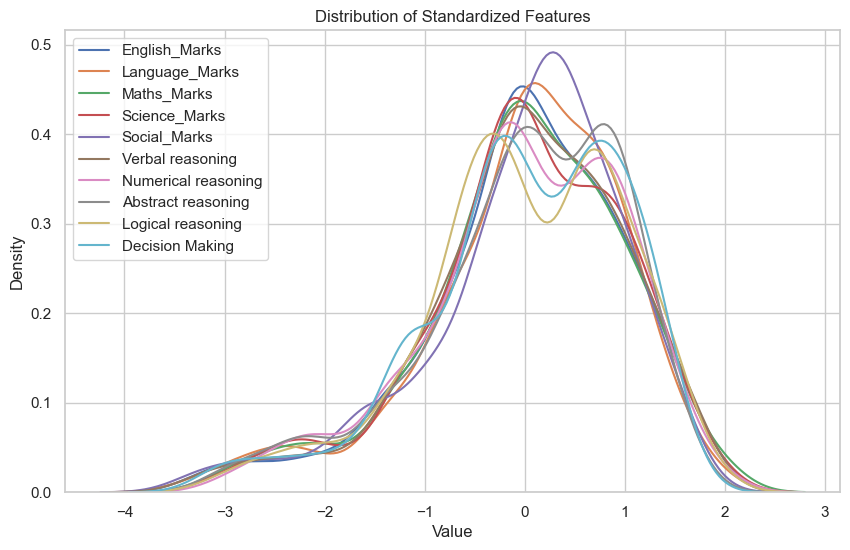

In [149]:
standardized_df = pd.DataFrame(standardized_data, columns=dff.columns)

# Plotting the standardized data
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# Plot each feature
for i, feature in enumerate(standardized_df.columns):
    sns.kdeplot(standardized_df[feature], label=feature)

plt.title('Distribution of Standardized Features')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()

In [150]:
standardized_df.head()

,English_Marks,Language_Marks,Maths_Marks,Science_Marks,Social_Marks,Verbal reasoning,Numerical reasoning,Abstract reasoning,Logical reasoning,Decision Making
0,-1.197413,-1.203515,-2.018730,-1.883107,-1.658878,-1.211963,-2.059880,-2.079246,-1.829687,-1.625102
1,-1.197413,-1.203515,-2.018730,-1.883107,-1.658878,-1.211963,-2.059880,-2.079246,-1.829687,-1.625102
2,1.022318,0.998746,0.063633,0.006158,1.092141,1.167053,-1.438418,1.126593,0.233339,0.942894
3,-1.752346,-1.778017,-1.837655,-2.242967,-2.025681,-1.669466,-1.882320,-1.910518,-1.657769,-1.542263
4,-1.012436,-1.012014,-1.113355,-1.163387,-0.741872,-0.937461,-0.994517,-0.898147,-1.142012,-0.796716


In [190]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20,random_state=3 )

In [203]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

clf = RandomForestClassifier()
clf.fit(x_train, y_train)
clf.score(x_test, y_test)

0.8583333333333333

In [192]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [157]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.


In [193]:
from sklearn.metrics import accuracy_score
y_preds = clf.predict(x_test)
y_preds

array([0, 2, 0, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 0, 2, 1, 0, 2, 0, 3, 2,
       0, 0, 2, 2, 2, 0, 2, 2, 0, 0, 2, 1, 3, 2, 2, 2, 0, 0, 3, 2, 3, 3,
       0, 3, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 3, 2, 2, 0,
       1, 0, 2, 3, 3, 2, 0, 2, 2, 3, 0, 2, 2, 2, 0, 3, 2, 0, 2, 1, 0, 2,
       0, 3, 0, 2, 3, 0, 2, 0, 2, 0, 2, 0, 3, 0, 0, 0, 3, 2, 0, 2, 0, 0,
       2, 0, 2, 0, 0, 2, 0, 2, 0, 0])

In [204]:
accuracy = accuracy_score(y_test, y_preds)

In [205]:
accuracy

0.8583333333333333

In [206]:
import xgboost as xgb

In [208]:
dtrain = xgb.DMatrix(x_train, label=y_train)
dtest = xgb.DMatrix(x_test, label=y_test)

params = {
    'objective': 'multi:softprob',  # Specify the learning task and the objective (multi-class classification)
    'num_class': 4,  # Number of classes in the dataset
    'max_depth': 4,  # Maximum depth of a tree
    'eta': 0.1,  # Learning rate
    'subsample': 0.8,  # Subsample ratio of the training instance
    'colsample_bytree': 0.8,  # Subsample ratio of columns when constructing each tree
    'eval_metric': 'mlogloss'
}

num_boost_round = 200


bst = xgb.train(params, dtrain, num_boost_round)
preds = bst.predict(dtest)
best_preds = [int(np.argmax(line)) for line in preds]
accuracy = accuracy_score(y_test, best_preds)
accuracy

0.8416666666666667

In [209]:
from catboost import CatBoostClassifier

In [218]:
model = CatBoostClassifier(
    iterations=500,
    learning_rate=0.1,
    depth=4,
    l2_leaf_reg=3,
    border_count=128,
    loss_function='MultiClass',
    verbose=False 
)

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

In [219]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8583333333333333

In [220]:
from sklearn.model_selection import GridSearchCV

In [ ]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier(objective='multi:softprob', num_class = 4)

param_grid = {
    'max_depth': [3, 4, 5, 6, 7],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0]
}

# Perform grid search
grid_search = GridSearchCV(estimator=xgb_clf, param_grid=param_grid, scoring='accuracy', cv=3, verbose=1)
grid_search.fit(x_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

# Train the model with best parameters
best_model = grid_search.best_estimator_
best_model.fit(x_train, y_train)

# Make predictions
y_pred = best_model.predict(x_test)

acc = accuracy_score(y_test, y_pred)
acc

Fitting 3 folds for each of 1500 candidates, totalling 4500 fits
